In [19]:
import numpy as np
import matplotlib.pyplot as plt


In [1]:
from google.colab import files
uploaded = files.upload()
%ls

Saving test_inputs.csv to test_inputs.csv
Saving test_targets.csv to test_targets.csv
Saving train_inputs.csv to train_inputs.csv
Saving train_targets.csv to train_targets.csv
sample_data/     test_targets.csv  train_targets.csv
test_inputs.csv  train_inputs.csv


In [4]:
# load dataset

test_inputs = np.genfromtxt('test_inputs.csv', delimiter=',')
test_targets = np.genfromtxt('test_targets.csv', delimiter=',')
train_inputs = np.genfromtxt('train_inputs.csv', delimiter=',')
train_targets = np.genfromtxt('train_targets.csv', delimiter=',')

In [5]:
#add 1 at the end of each input to treat that as x0 (coefficient/intercept)

train_inputs = np.concatenate((train_inputs,np.ones((train_inputs.shape[0],1))),1)
test_inputs = np.concatenate((test_inputs,np.ones((test_inputs.shape[0],1))),1)

In [6]:
# lambda values to be evaluated by cross validation
#hyperparameter Regularization
hyperparams = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 
               1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 
               2.5, 2.6, 2.7, 2.8, 2.9, 3.0]
k_folds = 10

In [11]:
def train_linear_regression(train_inputs, train_targets, lambda_hyperparam):
  #((λI + A)w = b)
  A = np.matmul(train_inputs.transpose(), train_inputs) + lambda_hyperparam * np.identity(train_inputs.shape[1])
  #(A = xn * xn Transpose)
  b = np.matmul(train_inputs.transpose(), train_targets)
  #( b = tn * xn)
  weights = np.linalg.solve(A,b)
  return weights

In [12]:
def eval_linear_regression(inputs, weights, targets):
  errors = predict_linear_regression(inputs,weights) - targets
  mean_squared_error = np.sum(errors ** 2) / len(targets)
  return mean_squared_error

In [13]:
def predict_linear_regression(inputs, weights):
  predicted_values = np.matmul(inputs,weights)
  return predicted_values

In [17]:
# cross-validate using various hyperperparameters
inputs = train_inputs
targets = train_targets
fold_size = len(targets)/k_folds
mean_squared_errors = np.zeros(len(hyperparams))
for id, hyperparam in enumerate(hyperparams):
  for fold in range(k_folds):
    validation_inputs = inputs[int(round(fold*fold_size)):int(round((fold+1)*fold_size))]
    validation_targets = targets[int(round(fold*fold_size)):int(round((fold+1)*fold_size))]
    train_inputs = np.concatenate((inputs[:int(round(fold*fold_size))],inputs[int(round((fold+1)*fold_size)):]))
    train_targets = np.concatenate((targets[:int(round(fold*fold_size))],targets[int(round((fold+1)*fold_size)):]))
    weights = train_linear_regression(train_inputs, train_targets, hyperparam)
    mean_squared_errors[id] += eval_linear_regression(validation_inputs,weights, validation_targets)
mean_squared_errors /= k_folds
best_mean_squared_error = np.min(mean_squared_errors)
best_hyperparam = hyperparams[np.argmin(mean_squared_errors)]


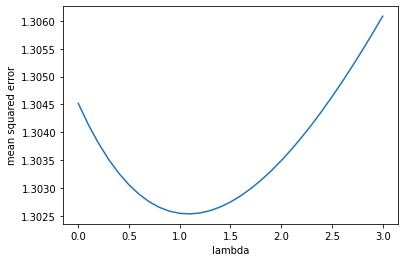

best lambda: 1.1
best cross validation mean squared error: 1.3025347869923087


In [21]:
# plot results
plt.plot(hyperparams,mean_squared_errors)
plt.ylabel('mean squared error')
plt.xlabel('lambda')
plt.show()
print('best lambda: ' + str (best_hyperparam))
print('best cross validation mean squared error: ' + str(best_mean_squared_error))


In [23]:
# train and evaluate with best lambda
weights = train_linear_regression(train_inputs,train_targets,best_hyperparam)
mean_squared_error = eval_linear_regression(test_inputs, weights, test_targets)
print('test mean squared error: ' + str(mean_squared_error))

test mean squared error: 1.4724562084562367
